In [1]:
!pip install tweepy textblob

     ---------------------------------------- 98.5/98.5 kB 1.9 MB/s eta 0:00:00


In [23]:
import pandas as pd
from textblob import TextBlob


data = pd.read_csv('Twitter Sentiments.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [21]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)

    if analysis.sentiment.polarity > 0:
        return 0  # Positive sentiment
    elif analysis.sentiment.polarity < 0:
        return 1  # Negative sentiment
    else:
        return -1  # Neutral sentiment

In [22]:
data['sentiment'] = data['tweet'].apply(analyze_sentiment)

sentiment_map = {0: 'positive', 1: 'negative', -1: 'neutral'}
data['sentiment_label'] = data['sentiment'].map(sentiment_map)

print(data[['tweet', 'sentiment_label']])

data.to_csv('Twitter Sentiments with Labels.csv', index=False)

                                                   tweet sentiment_label
0       @user when a father is dysfunctional and is s...        negative
1      @user @user thanks for #lyft credit i can't us...        positive
2                                    bihday your majesty         neutral
3      #model   i love u take with u all the time in ...        positive
4                 factsguide: society now    #motivation         neutral
...                                                  ...             ...
31957  ate @user isz that youuu?ðððððð...         neutral
31958    to see nina turner on the airwaves trying to...        positive
31959  listening to sad songs on a monday morning otw...        negative
31960  @user #sikh #temple vandalised in in #calgary,...         neutral
31961                   thank you @user for you follow           neutral

[31962 rows x 2 columns]


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = data['tweet']
y = data['label']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9452526200531832
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.93      0.25      0.40       456

    accuracy                           0.95      6393
   macro avg       0.94      0.63      0.68      6393
weighted avg       0.94      0.95      0.93      6393



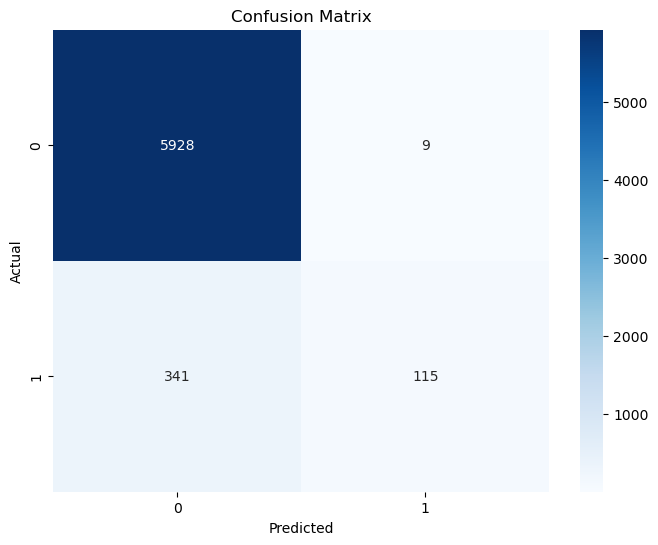

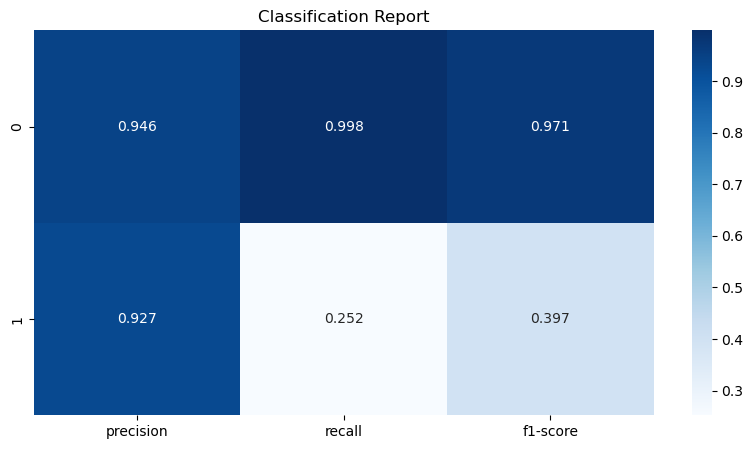

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

def plot_classification_report(y_true, y_pred):
    clf_report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(clf_report).transpose()
    df = df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
    df['support'] = df['support'].astype(int)
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.iloc[:, :3], annot=True, fmt=".3f", cmap='Blues')
    plt.title('Classification Report')
    plt.show()

y_pred = model.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

plot_classification_report(y_test, y_pred)

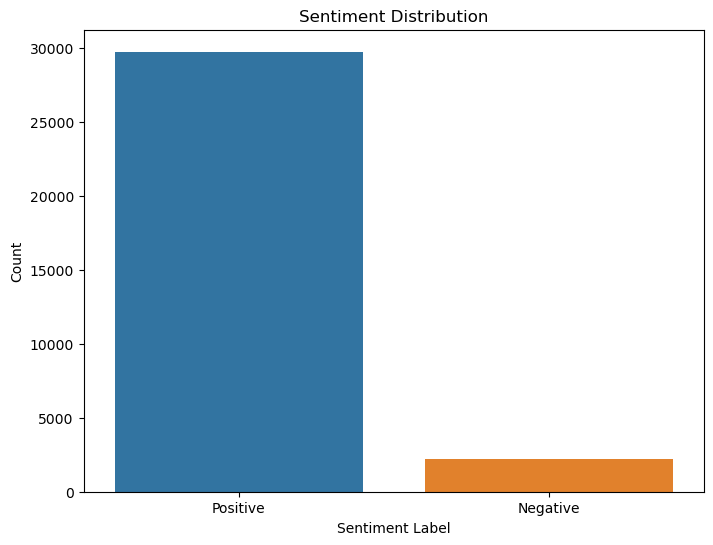

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.show()

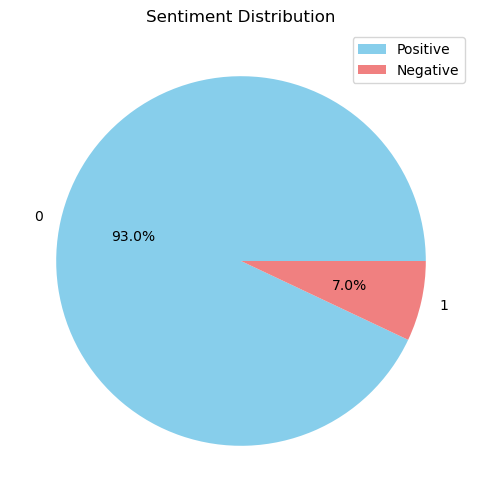

In [28]:
plt.figure(figsize=(6, 6))
data['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.legend(labels=['Positive', 'Negative'], loc='upper right')
plt.show()

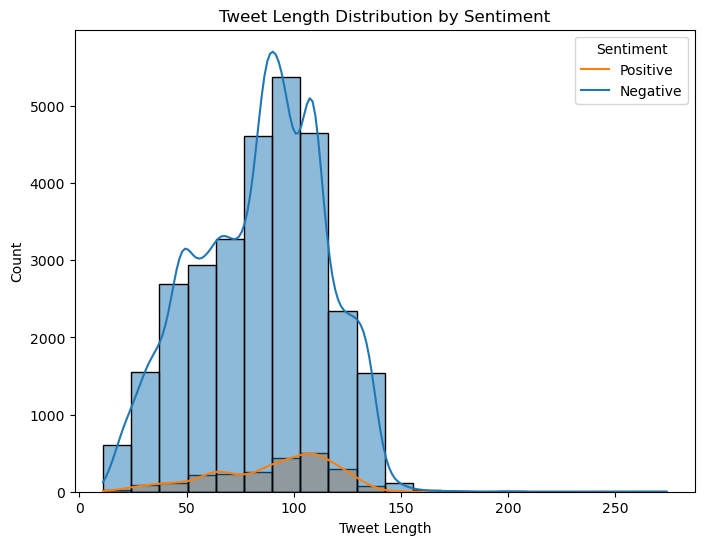

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=data['tweet'].apply(len), hue='label', bins=20, kde=True)
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.show()

In [30]:
def get_sentiment_scores(text):

    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

In [31]:
data['sentiment_score'] = data['tweet'].apply(get_sentiment_scores)

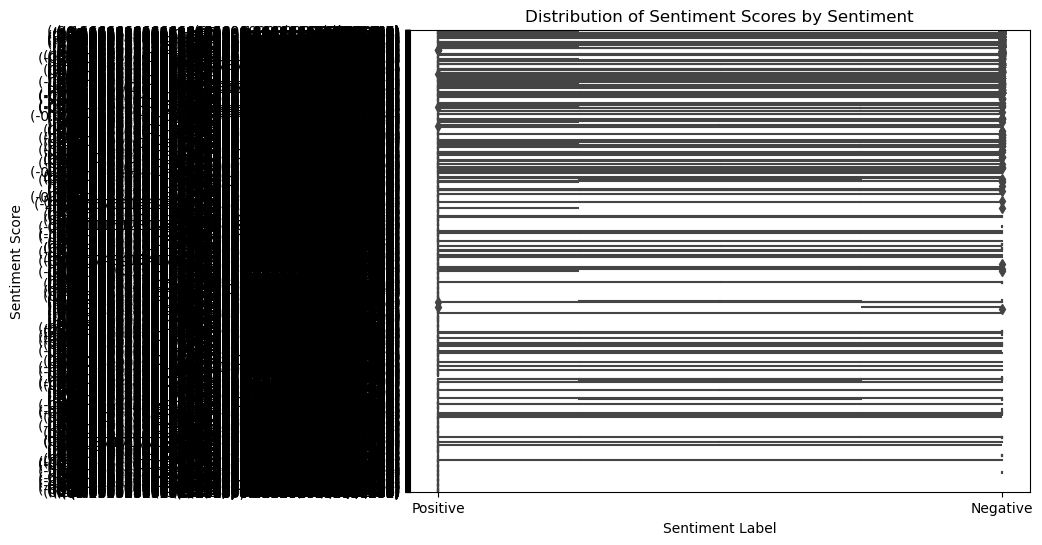

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='sentiment_score', data=data)
plt.title('Distribution of Sentiment Scores by Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.show()

In [39]:
!pip install wordcloud

     -------------------------------------- 300.0/300.0 kB 1.5 MB/s eta 0:00:00


In [40]:
from wordcloud import WordCloud
# Define a function to generate word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

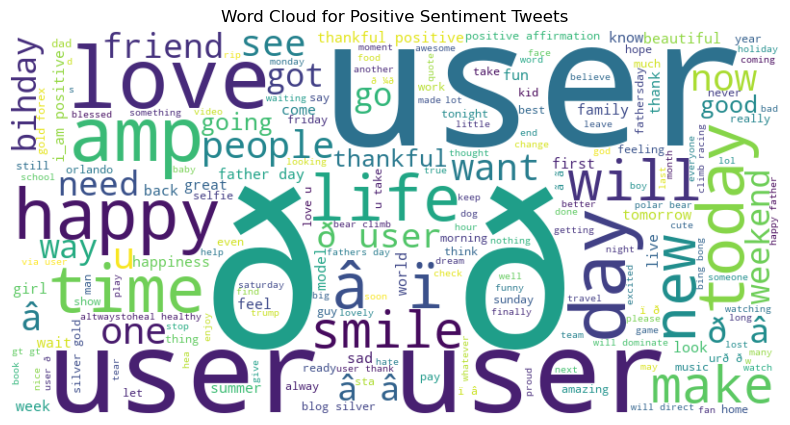

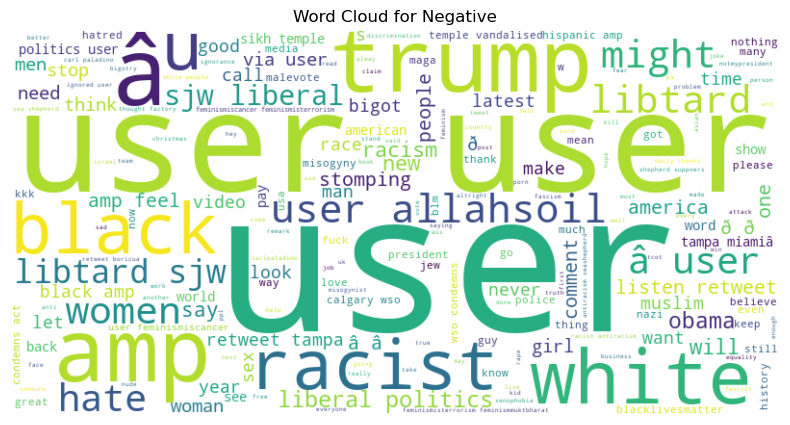

In [41]:
positive_tweets = data[data['label'] == 0]['tweet'].values
negative_tweets = data[data['label'] == 1]['tweet'].values

positive_tweets_text = ' '.join(positive_tweets)
generate_word_cloud(positive_tweets_text, 'Word Cloud for Positive Sentiment Tweets')

negative_tweets_text = ' '.join(negative_tweets)
generate_word_cloud(negative_tweets_text, 'Word Cloud for Negative')